# <center>Project - 5</center>
# <center>Tour & Travels Customer Churn Prediction</center>

In [ ]:
# import required library
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings

## 1. Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Customertravel.csv')
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


## 2. Give Labels to Data

In [ ]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


## 3. Data Visualization

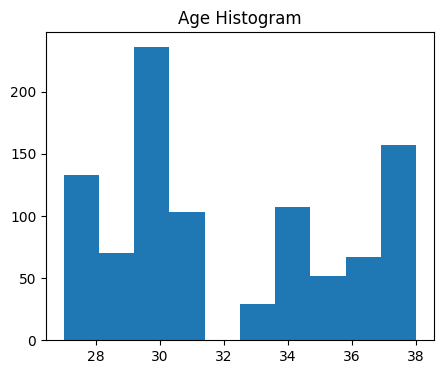

In [ ]:
plt.hist(x=df['Age'])
plt.title('Age Histogram')
warnings.filterwarnings("ignore")

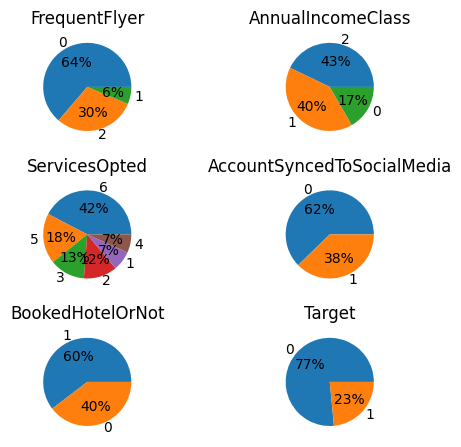

In [ ]:
rcParams['figure.figsize'] = 5,9
for i,col in enumerate(df.columns[1:7]):
  plt.subplot(6,2,i+1)
  plt.pie(df[col].value_counts(),labels=df[col].unique(),autopct='%.0f%%')
  plt.title(f"{col}")
  plt.tight_layout()

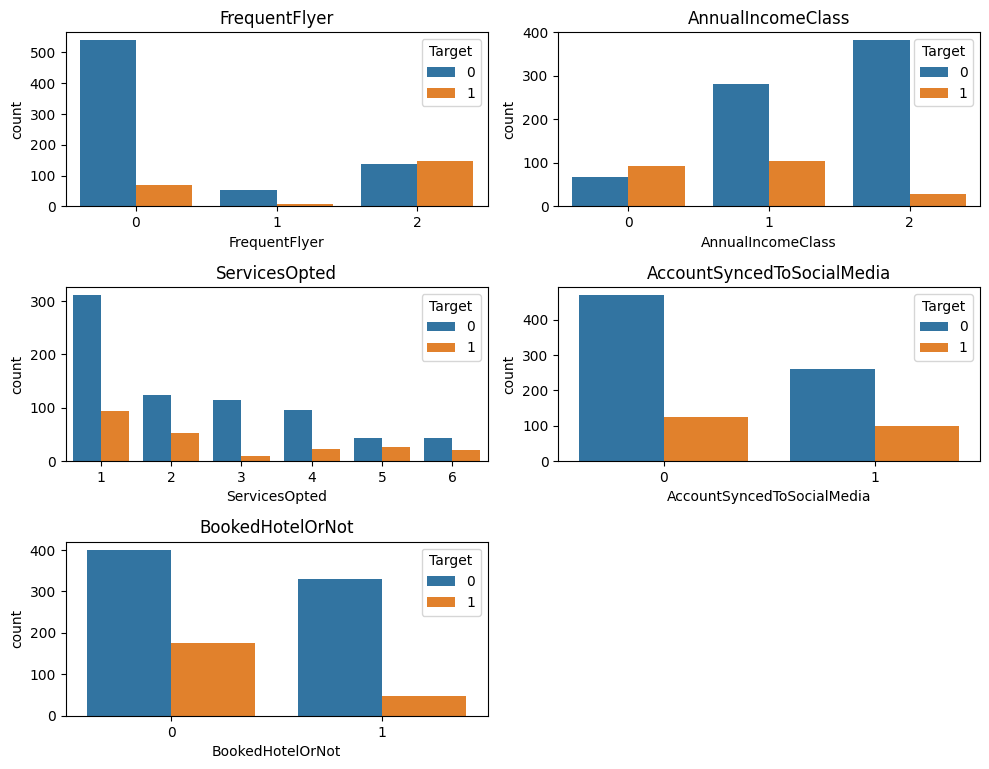

In [ ]:
rcParams['figure.figsize'] = 10,15
for i,col in enumerate(df.columns[1:6]):
  plt.subplot(6,2,i+1)
  sns.countplot(data=df,x=col,hue='Target')
  plt.title(f"{col}")
  plt.tight_layout()

## Split Data into Training & Testing

In [ ]:
# Make 'Target' field Target
X = df.drop(columns='Target')
Y = df['Target']

In [ ]:
# Split Data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

## Modeling

### 1. RandomForestClassifier

In [ ]:
clf1 = RandomForestClassifier()
clf1 = clf1.fit(X_train,Y_train)
Y_pred1 = clf1.predict(X_test)

In [ ]:
accuracy1 = accuracy_score(Y_test, Y_pred1)
print("Training Accuracy:",clf1.score(X_train,Y_train)*100,'%')
print("Testing Accuracy:",accuracy1*100,'%')

Training Accuracy: 95.2023988005997 %
Testing Accuracy: 88.85017421602788 %


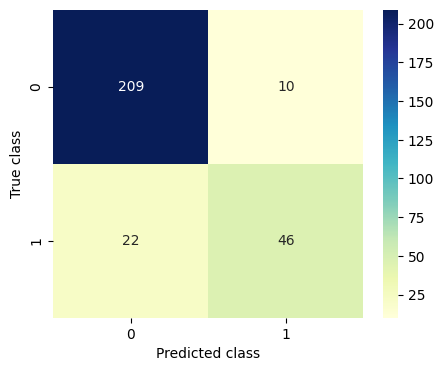

In [ ]:
rcParams['figure.figsize'] = 5,4
s=sns.heatmap(confusion_matrix(Y_test, Y_pred1),annot=True, fmt='g', cmap='YlGnBu')
s.set(xlabel='Predicted class', ylabel='True class')
warnings.filterwarnings("ignore")

### 2. XGBClassifier

In [ ]:
clf2 =  XGBClassifier()
clf2 = clf2.fit(X_train,Y_train)
Y_pred2 = clf2.predict(X_test)

In [ ]:
accuracy2 = accuracy_score(Y_test, Y_pred2)
print("Training Accuracy:",clf2.score(X_train,Y_train)*100,'%')
print("Testing Accuracy:", accuracy2*100,'%')

Training Accuracy: 95.05247376311844 %
Testing Accuracy: 89.54703832752612 %


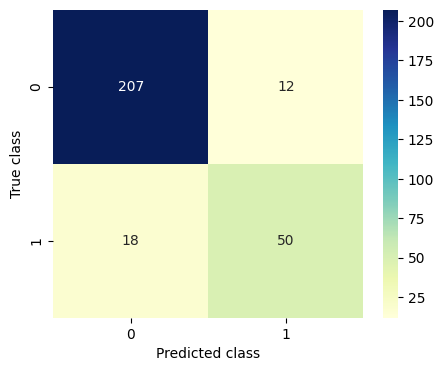

In [ ]:
s=sns.heatmap(confusion_matrix(Y_test, Y_pred2),annot=True, fmt='g', cmap='YlGnBu')
s.set(xlabel='Predicted class', ylabel='True class')
warnings.filterwarnings("ignore")

### 3. LogisticRegression

In [ ]:
clf3 =  LogisticRegression()
clf3 = clf3.fit(X_train,Y_train)
Y_pred3 = clf3.predict(X_test)

In [ ]:
accuracy3 = accuracy_score(Y_test, Y_pred3)
print("Training Accuracy:",clf3.score(X_train,Y_train)*100,'%')
print("Testing Accuracy:", accuracy3*100,'%')

Training Accuracy: 81.70914542728636 %
Testing Accuracy: 84.3205574912892 %


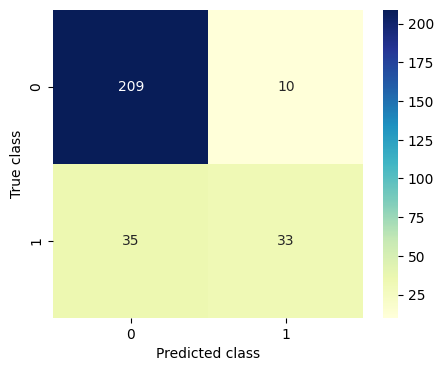

In [ ]:
s=sns.heatmap(confusion_matrix(Y_test, Y_pred3),annot=True, fmt='g', cmap='YlGnBu')
s.set(xlabel='Predicted class', ylabel='True class')
warnings.filterwarnings("ignore")

## Model Comparison

In [ ]:
from prettytable import PrettyTable
table = PrettyTable(["Train/Test","RandomForestClassifier","XGBClassifier","LogisticRegression"])
table.add_row(['Training Accuracy',str(round(clf1.score(X_train,Y_train)*100,2))+' %',str(round(clf2.score(X_train,Y_train)*100,2))+' %',str(round(clf3.score(X_train,Y_train)*100,2))+' %'])
table.add_row(['Testing Accuracy',str(round(accuracy1*100,2))+' %',str(round(accuracy2*100,2))+' %',str(round(accuracy3*100,2))+' %'])
print(table)

+-------------------+------------------------+---------------+--------------------+
|     Train/Test    | RandomForestClassifier | XGBClassifier | LogisticRegression |
+-------------------+------------------------+---------------+--------------------+
| Training Accuracy |         95.2 %         |    95.05 %    |      81.71 %       |
|  Testing Accuracy |        88.85 %         |    89.55 %    |      84.32 %       |
+-------------------+------------------------+---------------+--------------------+
